<a href="https://colab.research.google.com/github/justinjunge/Convergent-Wisdom-Project/blob/main/Holy_Texts_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Convergent Wisdom project! In this module, we will use natural language processing and sentiment analysis to conduct an in-depth study into the distribution of emotional language in the Hindu Bhagavad Gita, Muslim Qur'an, and Christian Bible. These texts ring true to billions of people around the world, suggesting that they may point to approximately universal aspects of psychology that we can seek to better understand. Commonalities and unique meanings across the texts are also discussed.

This first code block initializes necessary libraries and imports the religious texts.

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

github_csv_url_Gita = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/SrimadBhagavadGita.csv'
response1 = requests.get(github_csv_url_Gita)
if response1.status_code == 200:
  dfG = pd.read_csv(StringIO(response1.text))
else:
  print('Failed to fetch CSV File from Github')

github_csv_url_Bible = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/ChristianBible.csv'
response2 = requests.get(github_csv_url_Bible)
if response2.status_code == 200:
  dfB = pd.read_csv(StringIO(response2.text))
else:
  print('Failed to fetch CSV File from Github')

github_csv_url_Quran = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/Quran.csv'
response3 = requests.get(github_csv_url_Quran)
if response3.status_code == 200:
  dfQ = pd.read_csv(StringIO(response3.text))
else:
  print('Failed to fetch CSV File from Github')

# Gita (Hinduism) Sentiment Analysis

The Srimad Bhagavad Gita ("The Holy Song of God") is one of many revered scriptures within Hinduism. It is a 700-verse discourse between Arjuna, a famed archer, and Krishna, one of ten earthly manifestations (*avataras*) of the Hindu god Vishnu. The Gita takes place within the context of a larger scripture known as the Mahabharata, a sprawling epic centered on a family at war. Arjuna is reluctant to wage war on members of his own family even if it is the most righteous action in his situation to do so, and the Gita's discourse centers around Krishna convincing Arjuna that he must fight. Together, the Gita and the Mahabharata contain many thematic elements that form the backbone of Hindu mythology. Other prominent Hindu religious texts include the Vedas, the Upanishads, the Puranas, and the Ramayana.

This first code block initializes the SentimentIntensityAnalyzer tool, which then ascribes positivity, negativity, and neutrality to every sentence in the text. When viewed in Google CoLab, you can hover over the top right corner of the table and select the interactive data table button to filter and search the results.

In [ ]:
dfG['Positive'] = ''
dfG['Neutral'] = ''
dfG['Negative'] = ''

sentiment_analyzer = SentimentIntensityAnalyzer()

for index, row in dfG.iterrows():
    text = row['Text']
    sentiment_dict = sentiment_analyzer.polarity_scores(text)

    dfG.at[index,'Positive'] = sentiment_dict['pos']*100
    dfG.at[index,'Neutral'] = sentiment_dict['neu']*100
    dfG.at[index,'Negative'] = sentiment_dict['neg']*100

dfG

,Chapter,Verse,Text,Positive,Neutral,Negative
0,1,1,"Dhritarashtra spoke: On the field of Dharma, ...",5.9,87.9,6.2
1,1,2,Sanjaya spoke: Your son Duryodhana saw the arm...,0.0,91.2,8.8
2,1,3,"""My teacher, look at this magnificent army of ...",24.3,75.7,0.0
3,1,4,"There they are, warriors, great archers, all o...",29.3,63.5,7.2
4,1,5,And Dhrstaketu and Cekitana and the king of Ka...,13.9,86.1,0.0
...,...,...,...,...,...,...
695,18,74,Sanjaya spoke: Thus I have heard this astonish...,14.6,85.4,0.0
696,18,75,I have heard this supreme secret doctrine by t...,21.3,78.7,0.0
697,18,76,"O king, I remember, I memorize, this astonishi...",12.2,87.8,0.0
698,18,77,"And I remember, I memorize also, that wonderfu...",30.6,69.4,0.0


In general, the tool is on par with human assessments of emotionality. For example, the positive-appearing verse “I will give unshakable faith to any devotee who wishes to worship god in any form, as long as he worships with fervent faith” (7.21) receives a Positivity score of 53.8, a Negativity score of 0.0, and a Neutrality score of 46.2. The negative-appearing verse “Your enemies will say many scandalous things and they will ridicule your competence in war. What could be more disgraceful?” (2.36) receives a Positivity score of 0.0, a Negativity score of 54.2, and a Neutrality score of 45.8. The most positive verse in the Gita is 17.8 (“Foods that men of clarity prefer increase one's life span, strength, courage, good health, contentment, and pleasure. Such foods are tasty, mild, firm, and easy to digest.”), while the most negative verse is 16.4 (“But, Arjuna, the qualities of a man born into a demonic destiny are: hypocrisy, arrogance, exaggerated pride, anger, harsh speech, and ignorance.”). Sixty-six verses in the Bhagavad Gita are tied for a Neutrality score of 100.0.

The following code generates a table of descriptive statistics for the Gita.

In [ ]:
summarystatsG = {
    "Mean Positivity": [np.mean(dfG.Positive)],
    "Mean Negativity": [np.mean(dfG.Negative)],
    "Median Positivity": [np.median(dfG.Positive)],
    "Median Negativity": [np.median(dfG.Negative)],
    "Range of Positivity": [(np.max(dfG.Positive)-np.min(dfG.Positive))],
    "Range of Negativity": [(np.max(dfG.Negative)-np.min(dfG.Negative))],
}

dfstatsG = pd.DataFrame(summarystatsG)
dfstatsG.index = ["Bhagavad Gita"]
print(dfstatsG.to_string())

               Mean Positivity  Mean Negativity  Median Positivity  Median Negativity  Range of Positivity  Range of Negativity
Bhagavad Gita        13.920857         7.856143              12.75                5.6                 55.2                 49.0


The granularity can be adjusted such that statistics can be calculated by chapter. This also allows us to use graphing tools to visualize our data. Below is a visualization that describes the pattern of emotionality across each chapter of the Gita.

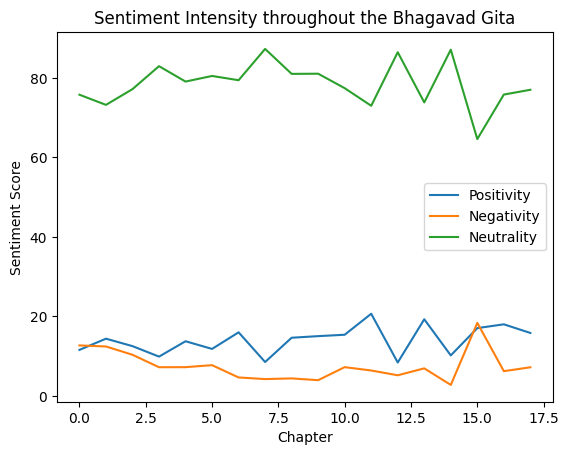

In [ ]:
GitaPositivity = []
GitaNegativity = []
GitaNeutrality = []

num_chaptersG = dfG['Chapter'].max()
Gita = [''] * num_chaptersG

for i in range(num_chaptersG):
  Gita[i] = dfG[dfG['Chapter']==i+1]
  GitaPositivity.append((np.mean(Gita[i].Positive)))
  GitaNegativity.append((np.mean(Gita[i].Negative)))
  GitaNeutrality.append((np.mean(Gita[i].Neutral)))

plt.plot(GitaPositivity, label = "Positivity")
plt.plot(GitaNegativity, label = "Negativity")
plt.plot(GitaNeutrality, label = "Neutrality")
plt.legend()
plt.title("Sentiment Intensity throughout the Bhagavad Gita")
plt.xlabel("Chapter")
plt.ylabel("Sentiment Score")
plt.show()

Fascinating, right? We can also take our tools one step further and create visualizations that more completely describe the distribution of emotionality across each text. See below.

Text(0.5, 1.0, 'Distribution of Positivity Across All Gita Verses')

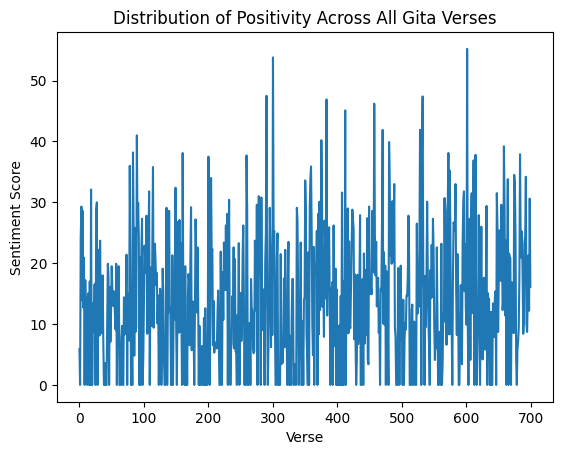

In [ ]:
plt.plot(dfG.Positive)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Positivity Across All Gita Verses")

Text(0.5, 1.0, 'Distribution of Negativity Across All Gita Verses')

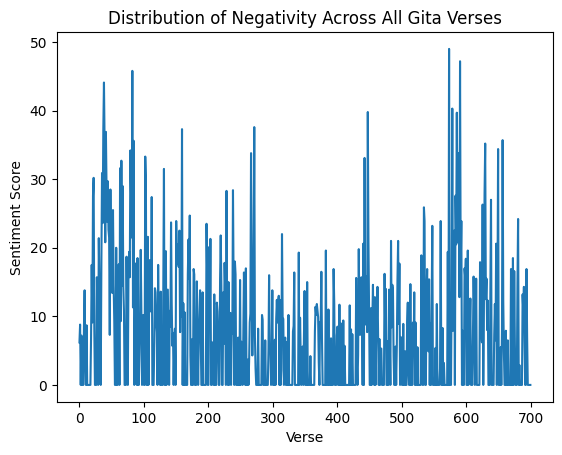

In [ ]:
plt.plot(dfG.Negative)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Negativity Across All Gita Verses")

Let's hone in on the negativity distribution graph a little closer. The two visualizations below highlight a section for further analysis.

Text(0.5, 1.0, 'Highlight of Negativity Drop in the Middle of the Gita')

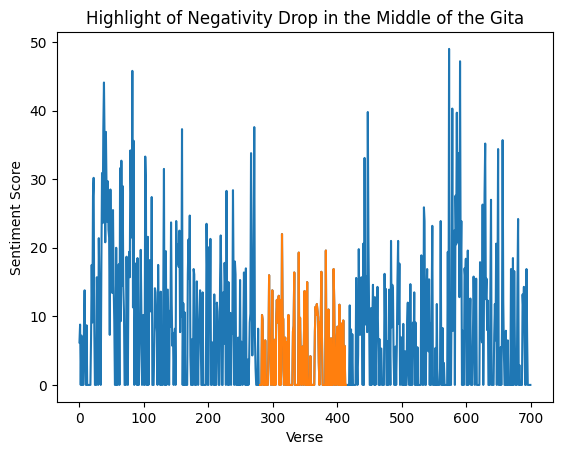

In [ ]:
plt.plot(dfG.Negative)
plt.plot(dfG.Negative[(dfG.Chapter > 6) & (dfG.Chapter < 11)])
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Highlight of Negativity Drop in the Middle of the Gita")

Text(0.5, 1.0, "Overlay of Gita's Positivity (Blue) and Negativity (Orange) Distributions")

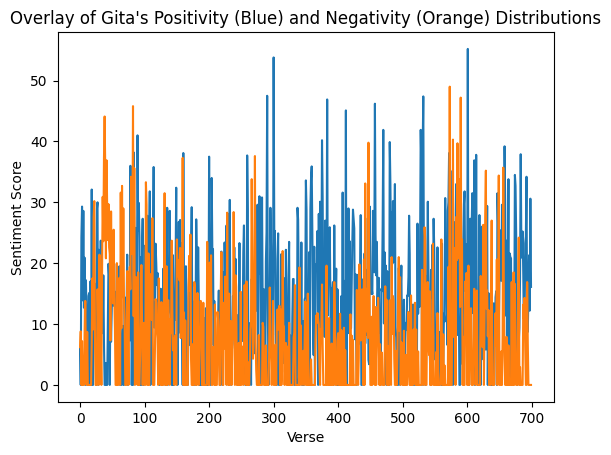

In [ ]:
plt.plot(dfG.Positive)
plt.plot(dfG.Negative)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Overlay of Gita's Positivity (Blue) and Negativity (Orange) Distributions")

The SentimentIntensityAnalyzer detects a sizable drop in negativity in the middle section of the Gita against a backdrop of high positivity. What might be going on here?

The Gita is composed of three sections, the first focused on action (*karma*), the second on devotional love (*bhakti*), and the third on knowledge (*gyana*). The *bhakti* section comprises chapters 7-12, which lines up neatly with what the SentimentIntensityAnalyzer highlighted as a unique range of verses in the text with a pattern of high positivity and low negativity.

In this section, Krishna reveals his true  form and shows how it is through love for Him that liberation (*moksha*) from the cycle of birth and death is achievable. Krishna affirms the oneness of God and explains that a human’s actions are but an instrument of the destiny God has planned for them. He describes himself as the thread that runs through the pearls of the universe (7.7) as the all-pervading creator, sustainer, and destroyer. Other themes include that every unit of the world is contained within God and that God is contained within every unit, that devotion from the heart is accepted more from God than is strict adherence to ritualistic injunctions, that all religions can be considered “true” if their devotees worship wholeheartedly (7.21), and that, through practice of devotional love, God can even become one’s friend (9.29). Krishna  uses vivid imagery in this section to describe Himself, including that he is the taste in water (7.8), the strength of the strong (7.8), a bright lamp of knowledge (10.11) equal to that of thousands of blazing stars (11.12), happiness (10.4), sorrow (10.5), heat (8.19), the sun and the moon (10.21), consciousness (10.22), the superlative of all
categories (chapters 10 and 11), a shelter for the entire world (11.38), silence (10.38), and even time itself (11.33). The content of this section make it clear why and how the SentimentIntensityAnalyzer made its decisions.

# Qur'an (Islam) Sentiment Analysis

The Qur'an is the central religious text of Islam, revered by Muslims worldwide as the unadulterated word of God (Allah) revealed to the Prophet Muhammad (peace be upon him) via the archangel Gabriel (Jibril). The Qur'an contains over 6200 verses spread out over 114 chapters, totaling 600 pages. The Prophet received the revelations periodically through his life, starting from the first one he received at the age of 40 while he was meditating in the cave of Hira on a mountain near Mecca, Saudi Arabia. The Qur'an, combined with various compilations of the sayings of the Prophet (known as hadith), comprises the textual basis of Islam.  

This first code block initializes the SentimentIntensityAnalyzer tool, which then ascribes positivity, negativity, and neutrality to every sentence in the text. When viewed in Google CoLab, you can hover over the top right corner of the table and select the interactive data table button to filter and search the results.

In [ ]:
dfQ['Positive'] = ''
dfQ['Neutral'] = ''
dfQ['Negative'] = ''

sentiment_analyzer = SentimentIntensityAnalyzer()

for index, row in dfQ.iterrows():
    text = row['Text']
    sentiment_dict = sentiment_analyzer.polarity_scores(text)

    dfQ.at[index,'Positive'] = sentiment_dict['pos']*100
    dfQ.at[index,'Neutral'] = sentiment_dict['neu']*100
    dfQ.at[index,'Negative'] = sentiment_dict['neg']*100

dfQ

,Surah,Ayah,Text,Positive,Neutral,Negative
0,1,1,"In the name of Allah, Most Gracious, Most Merc...",32.7,67.3,0.0
1,1,2,"Praise be to Allah, the Cherisher and Sustaine...",43.0,57.0,0.0
2,1,3,"Most Gracious, Most Merciful;",56.5,43.5,0.0
3,1,4,Master of the Day of Judgment.,0.0,100.0,0.0
4,1,5,"Thee do we worship, and Thine aid we seek.",21.6,78.4,0.0
...,...,...,...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,",0.0,100.0,0.0
6232,114,3,"The god (or judge) of Mankind,-",29.6,70.4,0.0
6233,114,4,"From the mischief of the Whisperer (of Evil), ...",0.0,61.5,38.5
6234,114,5,(The same) who whispers into the hearts of Man...,35.0,65.0,0.0


In general, the tool is on par with human assessments of emotionality. For example, the positive-appearing verse “Is there any reward for Good - other than Good?” (55.60) receives a Positivity score of 57.6, a Negativity score of 0.0, and a Neutrality score of 42.4. The negative-appearing verse “This is the Hell which the Sinners deny:” (55.43) receives a Positivity score of 0.0, a Negativity score of 53.8, and a Neutrality score of 46.2. The most positive verse in the Qur'an is 80.39 (“Laughing, rejoicing,” - in reference to the appearance of those rewarded Paradise on the Day of Judgment), while the most negative verse is 96.16 (“A lying, sinful forelock!” - in reference to the appearance of those rewarded Hell on the Day of Judgment).

However, it does seem that some verses of the Qur'an are misinterpreted by the tool. One example of a verse that could be construed as either positive or negative is 89.20 (“And ye love wealth with inordinate love!”). This verse receives a Positivity score of 74.8, a Neutrality score of 25.2, and a Negativity score of 0.0. In this section, Allah criticizes people who believe their fate is unduly unjust but who do no good actions towards earning a good fate and instead do actions (like loving wealth inordinately) that displease Allah. While the overall message of this section is a positive one (don't love wealth), the verse can be construed as a "negative verse" because it is one in which Allah berates humanity. The origin of these confusion may lie in certain stylistic tendencies of the Qur'an, such as the splitting of complete ideas across more than one verse or in the use of positive images to disincentivize negative behavior (and vice versa). This conundrum highlights the importance of selecting the right level of granularity when conducting sentiment analyses, an area of improvement for sentiment analysis tools (the need to understand stylistic nuances), and of the need for users to remain cognizant before jumping to conclusions.

The following code generates a table of descriptive statistics for the Qur'an.

In [ ]:
summarystatsQ = {
    "Mean Positivity": [np.mean(dfQ.Positive)],
    "Mean Negativity": [np.mean(dfQ.Negative)],
    "Median Positivity": [np.median(dfQ.Positive)],
    "Median Negativity": [np.median(dfQ.Negative)],
    "Range of Positivity": [(np.max(dfQ.Positive)-np.min(dfQ.Positive))],
    "Range of Negativity": [(np.max(dfQ.Negative)-np.min(dfQ.Negative))],
}

dfstatsQ = pd.DataFrame(summarystatsQ)
dfstatsQ.index = ["Qur'an"]
print(dfstatsQ.to_string())

        Mean Positivity  Mean Negativity  Median Positivity  Median Negativity  Range of Positivity  Range of Negativity
Qur'an        11.615106         8.563005               9.65                3.6                100.0                 78.5


The granularity can be adjusted such that statistics can be calculated by chapter. This also allows us to use graphing tools to visualize our data. Below is a visualization that describes the pattern of emotionality across each chapter of the Qur'an.

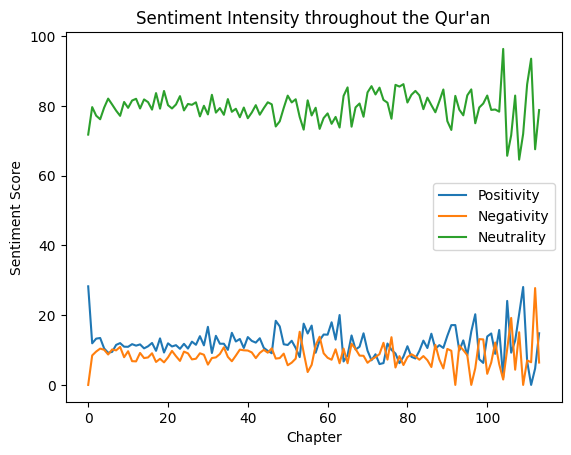

In [ ]:
QuranPositivity = []
QuranNegativity = []
QuranNeutrality = []

num_chaptersQ = dfQ['Surah'].max()
Quran = [''] * num_chaptersQ

for i in range(num_chaptersQ):
  Quran[i] = dfQ[dfQ['Surah']==i+1]
  QuranPositivity.append((np.mean(Quran[i].Positive)))
  QuranNegativity.append((np.mean(Quran[i].Negative)))
  QuranNeutrality.append((np.mean(Quran[i].Neutral)))

plt.plot(QuranPositivity, label = "Positivity")
plt.plot(QuranNegativity, label = "Negativity")
plt.plot(QuranNeutrality, label = "Neutrality")
plt.legend()
plt.title("Sentiment Intensity throughout the Qur'an")
plt.xlabel("Chapter")
plt.ylabel("Sentiment Score")
plt.show()

Fascinating, right? We can also take our tools one step further and create visualizations that more completely describe the distribution of emotionality across each text. See below.

Text(0.5, 1.0, "Distribution of Positivity Across All Qur'an Verses")

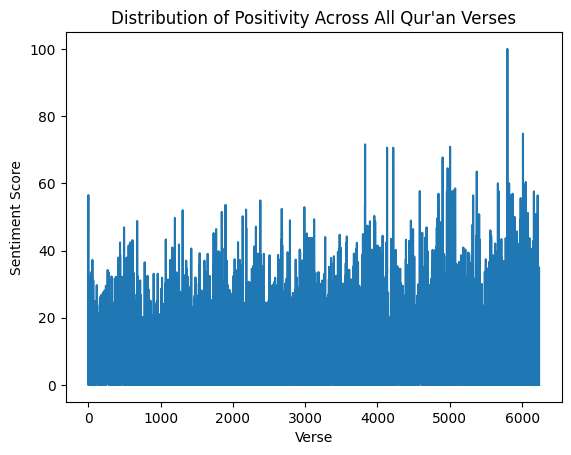

In [ ]:
plt.plot(dfQ.Positive)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Positivity Across All Qur'an Verses")

Text(0.5, 1.0, "Distribution of Negativity Across All Qur'an Verses")

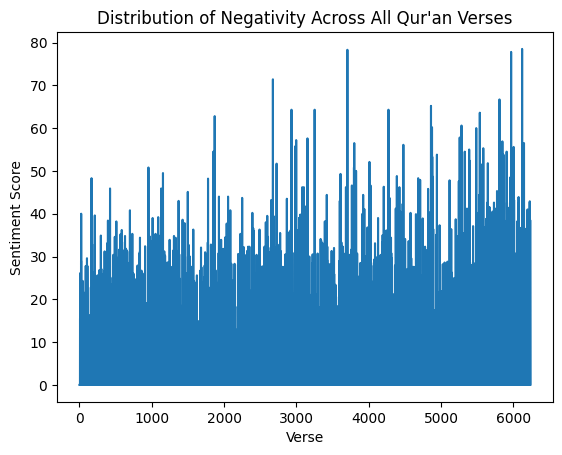

In [ ]:
plt.plot(dfQ.Negative)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Negativity Across All Qur'an Verses")

# Bible (Christianity) Sentiment Analysis

The Bible is the central religious text of Christianity and one of the most well-known and widely distributed scriptures in human history. Unlike the Gita and the Qur'an (whose lessons are divided into chapters and verses), the Bible is divided into 66 books that are further subdivided into two main sections: the Old Testament (before the arrival of Jesus Christ) and the New Testament (the life of Jesus Christ). The first five books of the Bible comrpise the Torah, a sacred scripture in Judaism. The Bible has been translated into hundreds of different languages and versions. The version used here is the King James Version (KJV).

This first code block initializes the SentimentIntensityAnalyzer tool, which then ascribes positivity, negativity, and neutrality to every sentence in the text. When viewed in Google CoLab, you can hover over the top right corner of the table and select the interactive data table button to filter and search the results.

In [ ]:
dfB['Positive'] = ''
dfB['Neutral'] = ''
dfB['Negative'] = ''

sentiment_analyzer = SentimentIntensityAnalyzer()

for index, row in dfB.iterrows():
    text = row['text']
    sentiment_dict = sentiment_analyzer.polarity_scores(text)

    dfB.at[index,'Positive'] = sentiment_dict['pos']*100
    dfB.at[index,'Neutral'] = sentiment_dict['neu']*100
    dfB.at[index,'Negative'] = sentiment_dict['neg']*100

dfB

,book,chapter,verse,text,Positive,Neutral,Negative
0,1,1,1,In the beginning God created the heaven and th...,51.4,48.6,0.0
1,1,1,2,"And the earth was without form, and void; and ...",11.9,81.8,6.3
2,1,1,3,"And God said, Let there be light: and there wa...",17.4,82.6,0.0
3,1,1,4,"And God saw the light, that it was good: and G...",32.1,58.8,9.0
4,1,1,5,"And God called the light Day, and the darkness...",8.7,83.0,8.3
...,...,...,...,...,...,...,...
31098,66,22,17,"And the Spirit and the bride say, Come. And le...",12.9,87.1,0.0
31099,66,22,18,For I testify unto every man that heareth the ...,5.5,94.5,0.0
31100,66,22,19,And if any man shall take away from the words ...,4.7,95.3,0.0
31101,66,22,20,"He which testifieth these things saith, Surely...",16.2,83.8,0.0


In general, the tool is on par with human assessments of emotionality. For example, the positive-appearing verse “But the fruit of the Spirit is love, joy, peace, longsuffering, gentleness, goodness, faith,” (Galatians 5:22) receives a Positivity score of 76.1, a Negativity score of 0.0, and a Neutrality score of 23.9. The negative-appearing verse “Consider mine enemies; for they are many; and they hate me with cruel hatred” (Psalms 25:19) receives a Positivity score of 0.0, a Negativity score of 59.8, and a Neutrality score of 40.2. The most positive verse in the Bible is 1 Timothy 6:6 ("But godliness with contentment is great gain"), while the most negative verse is John 11:35 (“Jesus wept”).

The following code generates a table of descriptive statistics for the Bible.

In [ ]:
summarystatsB = {
    "Mean Positivity": [np.mean(dfB.Positive)],
    "Mean Negativity": [np.mean(dfB.Negative)],
    "Median Positivity": [np.median(dfB.Positive)],
    "Median Negativity": [np.median(dfB.Negative)],
    "Range of Positivity": [(np.max(dfB.Positive)-np.min(dfB.Positive))],
    "Range of Negativity": [(np.max(dfB.Negative)-np.min(dfB.Negative))],
}

dfstatsB = pd.DataFrame(summarystatsB)
dfstatsB.index = ["Bible"]
print(dfstatsB.to_string())

       Mean Positivity  Mean Negativity  Median Positivity  Median Negativity  Range of Positivity  Range of Negativity
Bible         7.926149          5.52494                0.0                0.0                 77.1                 75.0


The granularity can be adjusted such that statistics can be calculated by book. This also allows us to use graphing tools to visualize our data. Below is a visualization that describes the pattern of emotionality across each book of the Bible.

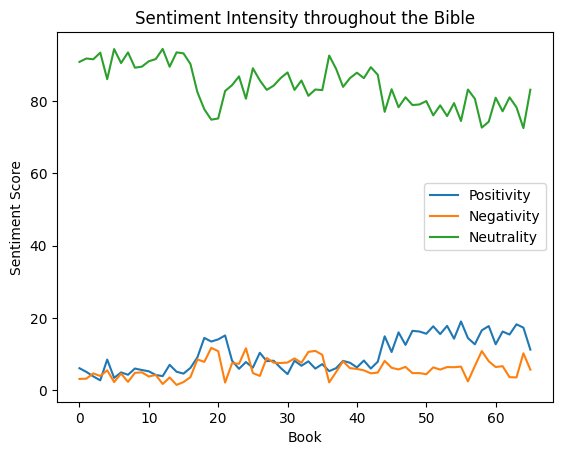

In [ ]:
BiblePositivity = []
BibleNegativity = []
BibleNeutrality = []

num_books = dfB['book'].max()
Bible = [''] * num_books

for i in range(num_books):
  Bible[i] = dfB[dfB['book']==i+1]
  BiblePositivity.append((np.mean(Bible[i].Positive)))
  BibleNegativity.append((np.mean(Bible[i].Negative)))
  BibleNeutrality.append((np.mean(Bible[i].Neutral)))

plt.plot(BiblePositivity, label = "Positivity")
plt.plot(BibleNegativity, label = "Negativity")
plt.plot(BibleNeutrality, label = "Neutrality")
plt.legend()
plt.title("Sentiment Intensity throughout the Bible")
plt.xlabel("Book")
plt.ylabel("Sentiment Score")
plt.show()

Fascinating, right? We can also take our tools one step further and create visualizations that more completely describe the distribution of emotionality across each text. See below.

Text(0.5, 1.0, 'Distribution of Positivity Across All Bible Verses')

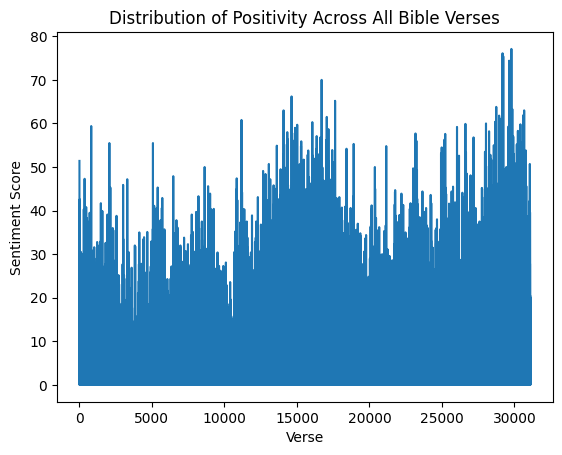

In [ ]:
plt.plot(dfB.Positive)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Positivity Across All Bible Verses")

Text(0.5, 1.0, 'Distribution of Negativity Across All Bible Verses')

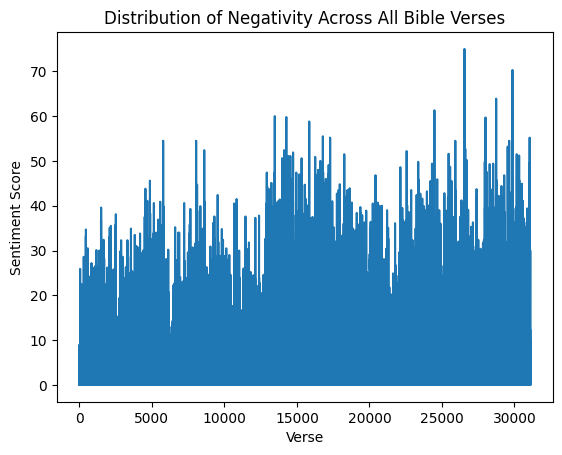

In [ ]:
plt.plot(dfB.Negative)
plt.xlabel("Verse")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Negativity Across All Bible Verses")

These graphs are more than just pretty. By zooming in on the interchange between positivity and negativity throughout the Bible, we can discover some interesting patterns. See below.

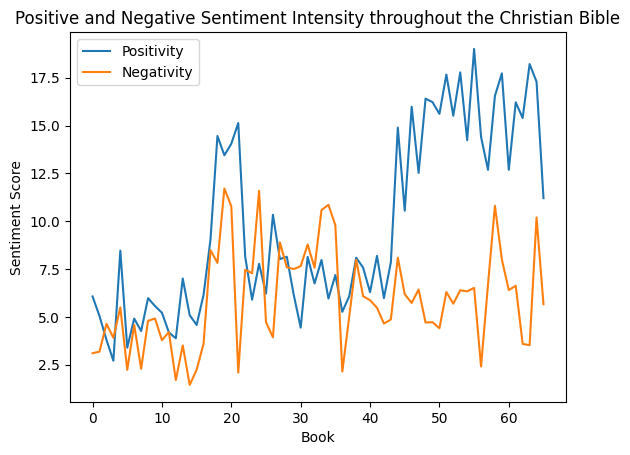

In [ ]:
plt.plot(BiblePositivity, label = "Positivity")
plt.plot(BibleNegativity, label = "Negativity")
plt.xlabel("Book")
plt.ylabel("Sentiment Score")
plt.title("Positive and Negative Sentiment Intensity throughout the Christian Bible")
plt.legend()
plt.show()

Around book 40, we see a drastic change in emotionality. While negative
sentiment appears to not change by much, positive sentiment drastically increases. What might be going on?

The answer is quite simple. The Bible is divided into the Old Testament—which comprises books 1 through 39 and primarily focuses on the beginnings of the world, foundational Jewish and Christian stories, the first prophets (such as Noah, Moses, etc.), pieces of wisdom in the books like Proverbs and Psalms, and continuing through the exile of the Jews into Babylon—and the New Testament, which comprises books 40-66 and focuses on the arrival, life, death, and resurrection of Jesus Christ. It is interesting that the SentimentIntensityAnalyzer plots such a drastic change in emotionality right along the division between the Old and New Testaments in line with the arrival of Jesus.

# Remarks

The application of natural language processing, sentiment analysis, and word cloud generation methodologies to the study of emotional religious psychology yields profound insights and opens countless new doors for discovery. In just one short notebook, our tools read through thousands of pages of sacred religious scripture and generated emotional data about them in seconds. When these data are paired with data from the lived experience of different religious practitioners, it becomes possible to see how life experiences and religious texts can both influence each others' emotional canvas. It also becomes possible to see how the world's great religions converge and diverge in their wisdom on human psychology.

While this cutting-edge interdisciplinary work is truly groundbreaking, the sheer potential for future researchers to catapult these methods to even greater heights is all the more exciting. The authors of this project can't wait to see how the global community of human scholars further expands on our initial ideas.

Have you checked out our other modules yet? See the Word Clouds and Heatmaps modules for even more exciting possibilities.